<a href="https://colab.research.google.com/github/IngaNdunu/Twitterr-Sentiment-Analysis/blob/main/sentiment_and_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("drive/")


Drive already mounted at drive/; to attempt to forcibly remount, call drive.mount("drive/", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/NLP")

In [ ]:
ls

FINAL REPORT:
9.90 % of the tweets were positive
14.52 % of the tweets were weakly positive
4.30 % of the tweets were strongly positive
2.84 % of the tweets were negative
6.87 % of the tweets were weakly negative
0.44 % of the tweets were strongly negative
60.47 % of the tweets were neutral


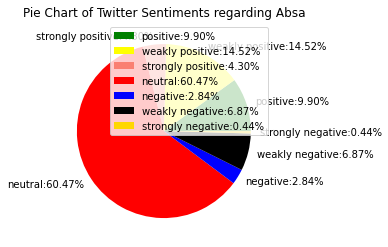

In [ ]:
import re
import string
import pandas as pd
import unicodedata
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
import spacy
import nltk
#nltk.download("all")
import matplotlib.pyplot as plt

from textblob import TextBlob

#The next bit will import the data
df = pd.read_excel("/content/drive/MyDrive/NLP/12AprMay2020.xlsx")
df.shape
#def punctuation_removal(messy_str):
  #try:
     #clean_list = [char for char in messy_str if char not in string.punctuation]
     #clean_str = ''.join(clean_list)
  #except TypeError:
    #pass
  #return clean_str
#df["extract"] = df['extract'].apply(punctuation_removal)

#The next bit will do Data Cleaning

def remove_numbers(list_text):
  list_text_new = []
  try:
    for i in list(list_text):
       if not re.search('\d',i):
          list_text_new.append(i)
  except TypeError :
    pass
  return ''.join(list_text_new)
df['extract'] = df['extract'].apply(remove_numbers)

#def lower_case(text):
  #texts = word_tokenize(text)
  #texts_lower = [x.lower() for x in texts]
  #return ''.join(texts_lower)
#df["extract"] = df['extract'].apply(lower_case)


def remove_accented_chars(text):
  new_text = unicodedata.normalize("NFKD",text).encode("ascii","ignore").decode("utf-8","ignore")
  return new_text
def remove_special_chars(text):
  pat = r'[^a-zA-z0-9]'
  return re.sub(pat," ",text)
df["extract"] = df["extract"].apply(remove_accented_chars)
df['extract'] = df['extract'].apply(remove_special_chars)
#df['extract'].isnull().sum()

#doing lemmatisation
def lemmatisation(text):
  lemmatizer  = WordNetLemmatizer() 
  text = ' '.join([lemmatizer.lemmatize(word) for word  in text.split()])
  return text


def stemmitisation(text):
  stemmer  = nltk.porter.PorterStemmer()
  text = ' '.join([stemmer.stem(word) for word in text.split()])
  return text
df["extract"] = df['extract'].apply(lemmatisation)
df['extract'] = df["extract"].apply(stemmitisation)


#The next bit will start building the Sentiment Analysis model


def polarity(text):
  textb = TextBlob(str(text))
  pola = textb.sentiment.polarity
  if pola == 0:
    return "neutral"
  elif  0 < pola <= 0.3:
    return "weakly  positive"
  elif 0.3<pola<= 0.6:
    return "positive"
  elif 0.6 < pola <= 1:
    return "strongly positive"
  elif -0.3< pola <= 0:
    return "weakly negative"
  elif -0.6 < pola < -0.3:
    return "negative"
  elif -1 < pola <= -0.6:
    return "strongly negative"

df['polarity'] = df['extract'].apply(polarity)


neutral = 0
weakly_positive = 0
strongly_positive = 0
positive = 0
negative = 0
weakly_negative = 0
strongly_negative = 0
polarity = 0
for i in range(0,len(df['extract'])):
  textb = TextBlob(str(df['extract'][i]))
  polarity += textb.sentiment.polarity
  pola = textb.sentiment.polarity
  if pola == 0:
    neutral += 1
  elif  0 < pola <= 0.3:
    weakly_positive += 1
  elif 0.3<pola<= 0.6:
    positive += 1
  elif 0.6 < pola <= 1:
    strongly_positive += 1
  elif -0.3< pola <= 0:
    weakly_negative += 1
  elif -0.6 < pola < -0.3:
    negative += 1
  elif -1 < pola <= -0.6:
    strongly_negative += 1

polarity = polarity / len(df['extract'])


def percent(part,full):
  temp = 100*float(part)/float(full)
  return format(temp,".2f")

positive = percent(positive,len(df['extract']))
weakly_positive = percent(weakly_positive,len(df['extract']))
strongly_positive = percent(strongly_positive,len(df['extract']))
negative = percent(negative,len(df['extract']))
weakly_negative = percent(weakly_negative,len(df['extract']))
strongly_negative = percent(strongly_negative,len(df['extract']))
neutral = percent(neutral,len(df['extract']))

print("FINAL REPORT:")
print(str(positive),"% of the tweets were positive")
print(str(weakly_positive),"% of the tweets were weakly positive")
print(str(strongly_positive),"% of the tweets were strongly positive")
print(str(negative),"% of the tweets were negative")
print(str(weakly_negative),"% of the tweets were weakly negative")
print(str(strongly_negative),"% of the tweets were strongly negative")
print(str(neutral),"% of the tweets were neutral")

sizes = [positive,weakly_positive,strongly_positive,neutral,negative,weakly_negative,strongly_negative]
colors = ["green","yellow","salmon","red","blue","black","gold"]
labels = ["positive"+":"+str(positive)+"%","weakly positive"+":" +str(weakly_positive)+"%","strongly positive"+":"+str(strongly_positive)+"%","neutral"+":"+str(neutral)+"%","negative"+":"+str(negative)+"%","weakly negative"+":"+str(weakly_negative)+"%","strongly negative"+":"+str(strongly_negative)+"%"]

plt.pie(sizes,labels = labels,colors = colors)
plt.legend(labels)
plt.title("Pie Chart of Twitter Sentiments regarding Absa")
plt.show()








